## Inversion of synthetic data
### written by Anton Ziegon

<div class="alert alert-info">
<h4>Note:</h4>

In this Notebook the synthetic data which was generated in the previous Notebook (``RM_pygimli_computations.ipynb``) will be inverted.

In [16]:
# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt
from    pygimli.physics         import ert
from    pygimli.physics         import TravelTimeManager
from    pygimli.physics         import gravimetry as grav

# Importing auxiliary libraries
import  numpy                   as     np
import  pandas                  as     pd
import  matplotlib.pyplot       as     plt
from    matplotlib.patches      import PathPatch 
import  os

%matplotlib inline

# Setting options
seed_val = 420
np.random.seed(seed_val)
pd.set_option('precision', 2)

### Parameters

In [17]:
# Filenames
fn_mesh    = 'mesh_combinedmodel.poly'
fn_ert_dd  = 'SyntheticData/ert_data_dd.dat'
fn_ert_slm = 'SyntheticData/ert_data_slm.dat'
fn_ert_wa  = 'SyntheticData/ert_data_wa.dat'
fn_tt      = 'SyntheticData/tt_data.dat'

### Load Mesh for comparison

(<AxesSubplot:>, None)

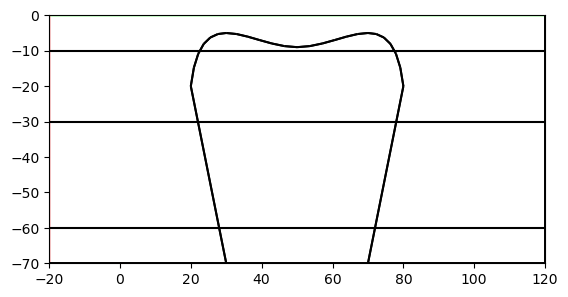

In [55]:
# # Load previous mesh
# geom_mesh = mt.readPLC(fn_mesh)
# pg.show(geom_mesh, fillRegion=False)

# Re-create subsurface geometry for display without mesh
world = mt.createWorld([-20,-70], [120, 0], layers=[-10,-30,-60])
pnts = [[20,-20], [30,-5], [50,-9], [70,-5], [80,-20]]
top = mt.createPolygon(pnts, addNodes=5, interpolate="spline")
left = mt.createLine([30,-70], pnts[0])
right = mt.createLine([70,-70], pnts[-1])
geom = world + top + left + right
pg.show(geom, fillRegion=False)

### ERT Inversion

... of Dipole-Dipole data

18/12/22 - 11:22:29 - pyGIMLi - INFO - Found 2 regions.
18/12/22 - 11:22:29 - pyGIMLi - INFO - Region with smallest marker (1) set to background
18/12/22 - 11:22:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/12/22 - 11:22:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
18/12/22 - 11:22:30 - pyGIMLi - INFO - Use median(data values)=294.736634510328
18/12/22 - 11:22:30 - pyGIMLi - INFO - Created startmodel from forward operator: 1748 [294.736634510328,...,294.736634510328]
18/12/22 - 11:22:30 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001AA4BC78CC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001AA4BC78BD0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001AA4BC78B30>
min/max (data): 90.05/882
min/max (error): 1%/1.36%
min/max (start model): 295/295
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1745.34 (dPhi = 23.61%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1169.57 (dPhi = 32.97%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 290.58 (dPhi = 75.07%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 100.36 (dPhi = 65.15%) lam: 20.0
-------------------------------------------------

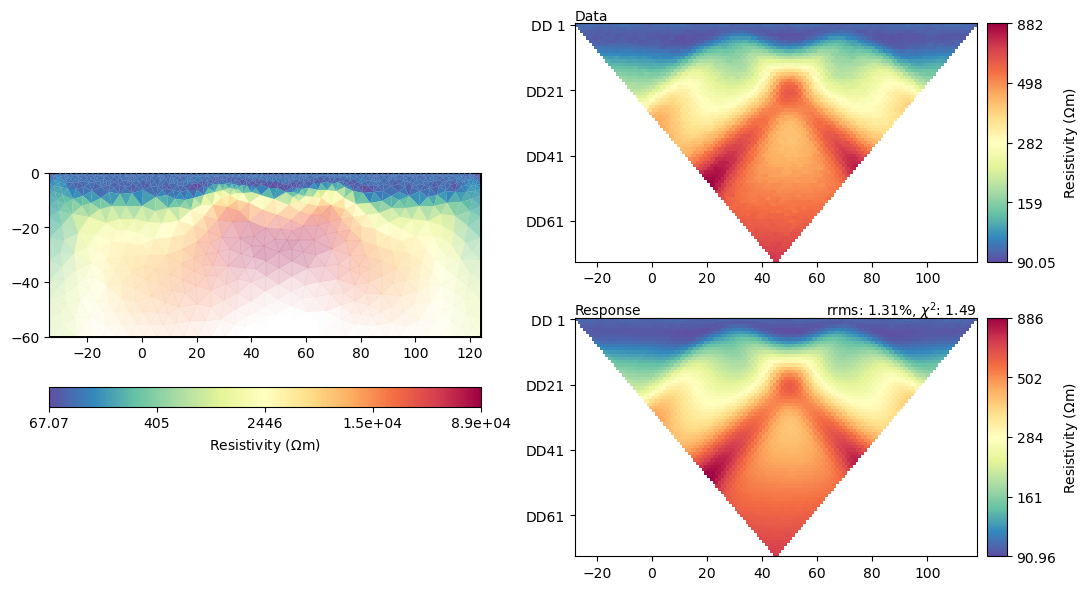

In [4]:
# Loading ERT Manager
mgr_dd = ert.ERTManager(fn_ert_dd)

# Load data
ert_data_dd = ert.load(fn_ert_dd)
#mgr_dd.showData(ert_data_dd)

# Inverting data
inv_dd = mgr_dd.invert(lam=20, secNodes=2, paraMaxCellSize=20, verbose=True)

# Show results
mgr_dd.showResultAndFit();

... of Schlumberger

18/12/22 - 11:24:58 - pyGIMLi - INFO - Found 2 regions.
18/12/22 - 11:24:58 - pyGIMLi - INFO - Region with smallest marker (1) set to background
18/12/22 - 11:24:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/12/22 - 11:24:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
18/12/22 - 11:24:58 - pyGIMLi - INFO - Use median(data values)=261.609082096073
18/12/22 - 11:24:58 - pyGIMLi - INFO - Created startmodel from forward operator: 1748 [261.609082096073,...,261.609082096073]
18/12/22 - 11:24:58 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001AA4BC6F3B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001AA7A5C0EF0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001AA4BC6FB80>
min/max (data): 98.88/790
min/max (error): 1%/1%
min/max (start model): 262/262
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 136.63 (dPhi = 53.42%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 7.05 (dPhi = 94.0%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 4.82 (dPhi = 26.61%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 4.63 (dPhi = 2.96%) lam: 20.0
--------------------------------------------------------------

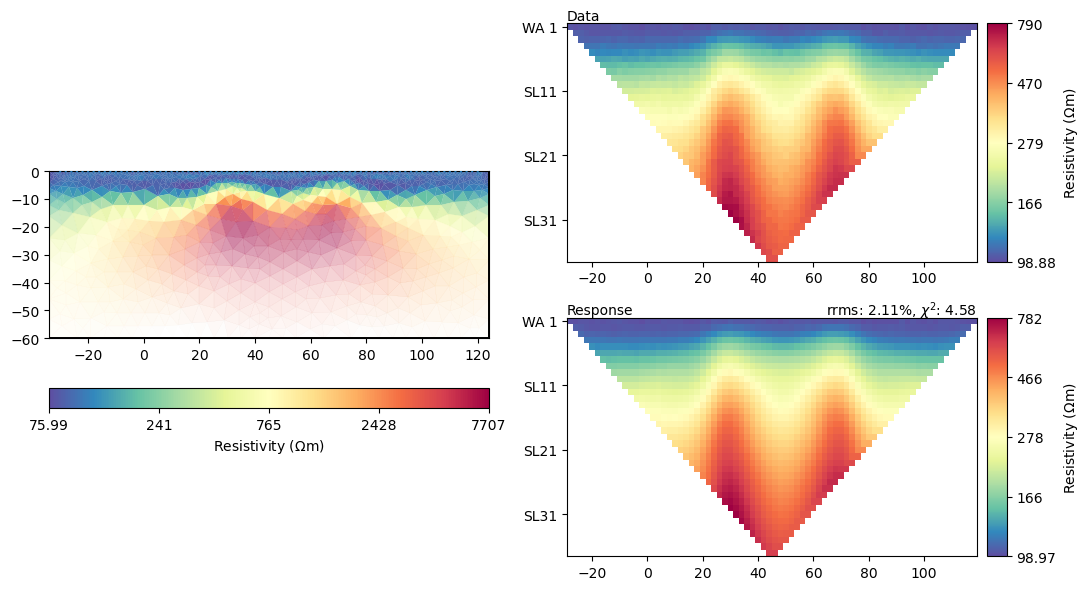

In [5]:
# Loading ERT Manager
mgr_slm = ert.ERTManager(fn_ert_slm)

# Load data
ert_data_slm = ert.load(fn_ert_slm)
#mgr_dd.showData(ert_data_slm)

# Inverting data
inv_slm = mgr_slm.invert(lam=20, secNodes=2, paraMaxCellSize=20, verbose=True)

# Show results
mgr_slm.showResultAndFit();

... of Wenner

18/12/22 - 11:25:47 - pyGIMLi - INFO - Found 2 regions.
18/12/22 - 11:25:47 - pyGIMLi - INFO - Region with smallest marker (1) set to background
18/12/22 - 11:25:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/12/22 - 11:25:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
18/12/22 - 11:25:47 - pyGIMLi - INFO - Use median(data values)=246.185155515028
18/12/22 - 11:25:47 - pyGIMLi - INFO - Created startmodel from forward operator: 1748 [246.185155515028,...,246.185155515028]
18/12/22 - 11:25:47 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001AA7AA90720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001AA7AA904F0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001AA7AA906D0>
min/max (data): 98.88/675
min/max (error): 1%/1%
min/max (start model): 246/246
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 129.76 (dPhi = 0.52%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 128.31 (dPhi = 1.2%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 125.09 (dPhi = 2.58%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 116.8 (dPhi = 6.66%) lam: 20.0
------------------------------------------------------------

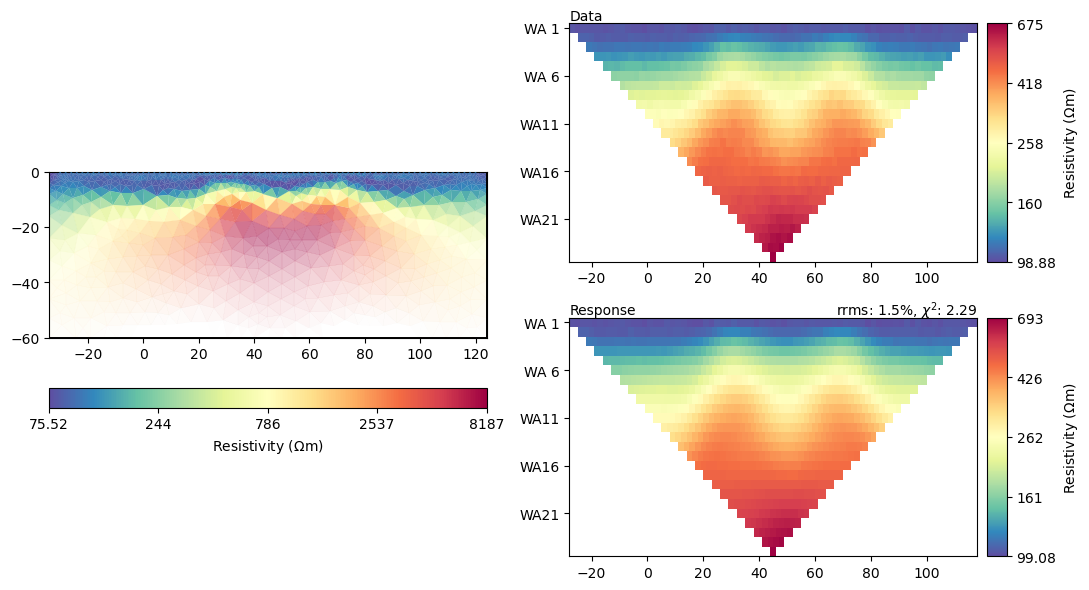

In [6]:
# Loading ERT Manager
mgr_wa = ert.ERTManager(fn_ert_wa)

# Load data
ert_data_wa = ert.load(fn_ert_wa)
#mgr_dd.showData(ert_data_wa)

# Inverting data
inv_wa = mgr_wa.invert(lam=20, secNodes=2, paraMaxCellSize=20, verbose=True)

# Show results
mgr_wa.showResultAndFit();

### ERT Comparison

Text(0.5, 1.0, 'Wenner')

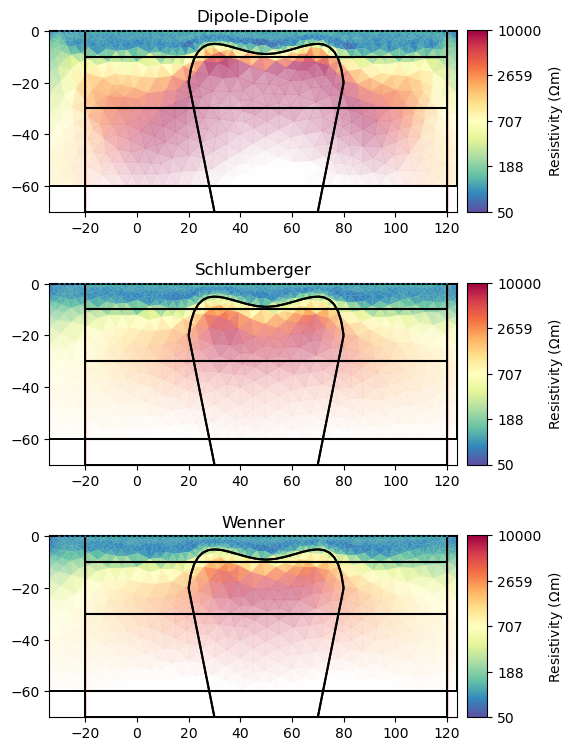

In [56]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12, 8)) 
fig.tight_layout(pad=3.0)

cmin = 5e1
cmax = 1e4

mgr_dd.showResult(ax=ax1, logScale=True, cMin=cmin, cMax=cmax, orientation="vertical")
mgr_slm.showResult(ax=ax2, logScale=True, cMin=cmin, cMax=cmax, orientation="vertical")
mgr_wa.showResult(ax=ax3, logScale=True, cMin=cmin, cMax=cmax, orientation="vertical")
pg.show(geom, ax=ax1, fillRegion=False)
pg.show(geom, ax=ax2, fillRegion=False)
pg.show(geom, ax=ax3, fillRegion=False)
ax1.set_title('Dipole-Dipole')
ax2.set_title('Schlumberger')
ax3.set_title('Wenner')

### TravelTime inversion

18/12/22 - 12:42:54 - pyGIMLi - INFO - Found 1 regions.
18/12/22 - 12:42:54 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/12/22 - 12:42:54 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
18/12/22 - 12:42:54 - pyGIMLi - INFO - Create gradient starting model. 600: 4000
18/12/22 - 12:42:54 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00134946 0.00146283 0.00161945 ... 0.00025604 0.00027715 0.00025635]
18/12/22 - 12:42:54 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001AA944554A0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001AA95DC6E50>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001AA95DC69A0>
min/max (data): 1.4e-04/0.1
min/max (error): 1.94%/729%
min/max (start model): 2.5e-04/0.0017
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.58 (dPhi = 35.42%) lam: 50
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.24 (dPhi = 19.96%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.12 (dPhi = 9.82%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 1.05 (dPhi = 5.35%) lam: 50.0
------------------------------------

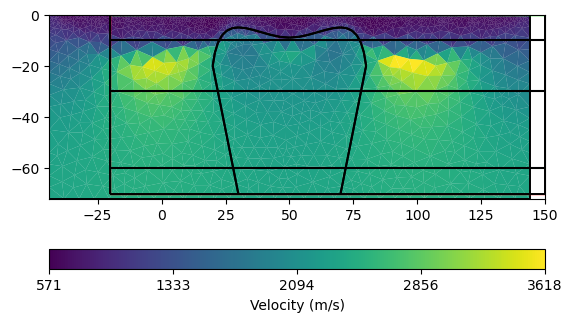

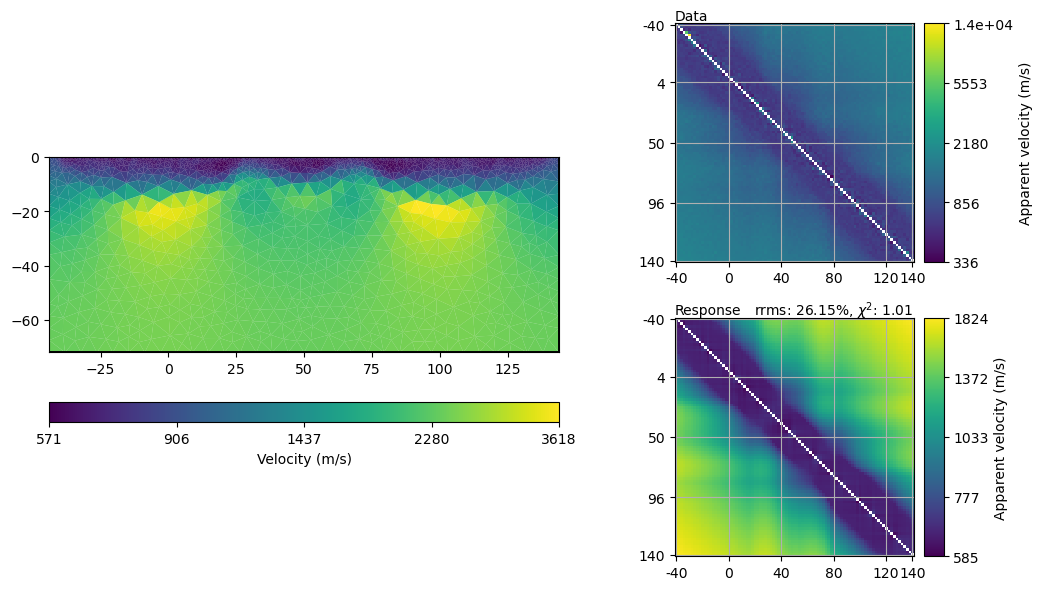

In [54]:
# Load TT Managern and data
mgr_tt = TravelTimeManager(fn_tt)
tt_data = pg.physics.traveltime.load(fn_tt)

# Invert data
vest = mgr_tt.invert(tt_data, secNodes=2, paraMaxCellSize=20, maxIter=15, verbose=True,
                  vTop=600, vBottom=4000, lam=50)
#np.testing.assert_array_less(mgr_tt.inv.inv.chi2(), 1.1)

ax, _ = mgr_tt.showResult(logScale=False)
pg.show(geom, ax=ax, fillRegion=False, regionMarker=False)

mgr_tt.showResultAndFit();